# Exercise 2

In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interactive

import pandas as pd
import numpy as np
import sympy as sp
from scipy.stats import norm

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

## 1.1 Distribution of a random variable X
Make sure you understand what the probability and density functions are and how they are related to the cumulative distribution function.
Let X denotes a continuous random variable, $X\in[0, +\infty]$, with a probability density function (pdf) $f(x)$ and cumulative distribution function (cdf) $F(x)$. 
* Please write down the relationship between $F(x)$ and $f(x)$.


In [2]:
x,t = sp.symbols('x t')
f = sp.Function('f')(x)  # PDF
F = sp.Function('F')(x)  # CDF

In [3]:
equation_CDF = sp.Eq(F,sp.Integral(f,(t, -sp.oo, x)))
equation_CDF

Eq(F(x), Integral(f(x), (t, -oo, x)))

* Please write down the mean and variance of the random variable $X$

In [4]:
x_mean = sp.symbols('\overline{x}')
sigma = sp.symbols('sigma') ## Standard deviation
n = sp.symbols('n')

### Mean value:

In [5]:
equation_mean_x = sp.Eq(x_mean,1/n*sp.Sum(x,(x, 1,n)))
equation_mean_x

Eq(\overline{x}, Sum(x, (x, 1, n))/n)

### Variance

In [6]:
equation_variance_x = sp.Eq(sigma**2,1/(n-1)*sp.Sum((x-x_mean)**2,(x, 1,n)))
equation_variance_x

Eq(sigma**2, Sum((-\overline{x} + x)**2, (x, 1, n))/(n - 1))

## 1.2	Empirical distribution $F(x)$ of random variable X

In [7]:
N=10000
MU=10
SIGMA=30
x_sample = np.random.normal(loc=MU, scale=SIGMA, size=N)

Compute the empirical distribution of $X$, $F_1(x)$, and plot it in a figure.

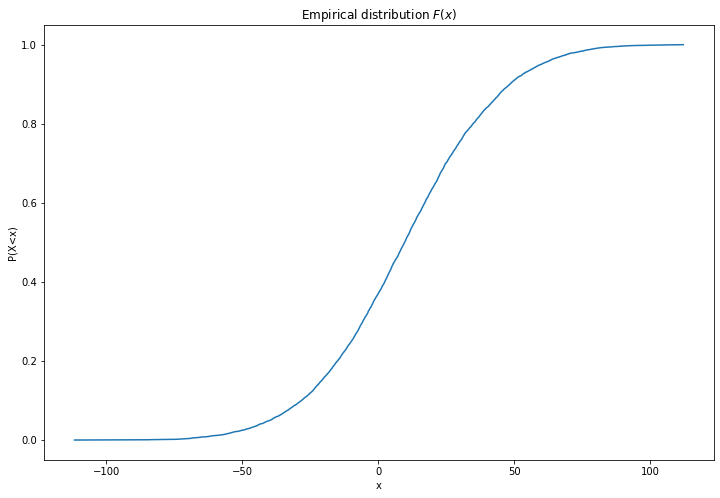

In [8]:
fig,ax = plt.subplots()

values = np.sort(x_sample)
density = np.arange(N)/N

ax.plot(values,density,'-');
ax.set_title('Empirical distribution $F(x)$');
ax.set_xlabel('x')
ax.set_ylabel('P(X<x)');

## Calculating empirical probability density function $f(x)$
Empirical probability density function $f(x)$ is calculated by conducting numerical derivation of the empirical distribution $F(x)$

In [9]:
smothing=400
x_ = np.linspace(np.min(values), np.max(values),int(N/smothing))
cdf_empirical = np.interp(x_, values,density)

Reduce the number of points to get more stable derivatives.

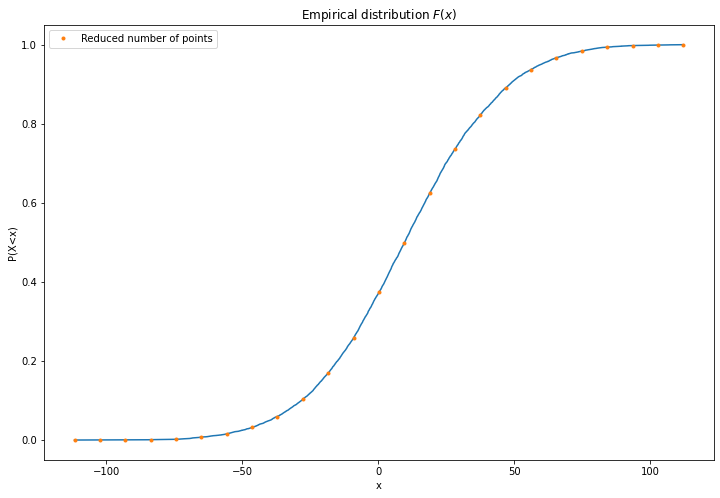

In [10]:
fig,ax = plt.subplots()
ax.plot(values,density,'-');
ax.plot(x_,cdf_empirical,'.', label='Reduced number of points');
ax.legend()

ax.set_title('Empirical distribution $F(x)$');
ax.set_xlabel('x')
ax.set_ylabel('P(X<x)');

In [11]:
pdf_empirical = np.gradient(cdf_empirical,x_)

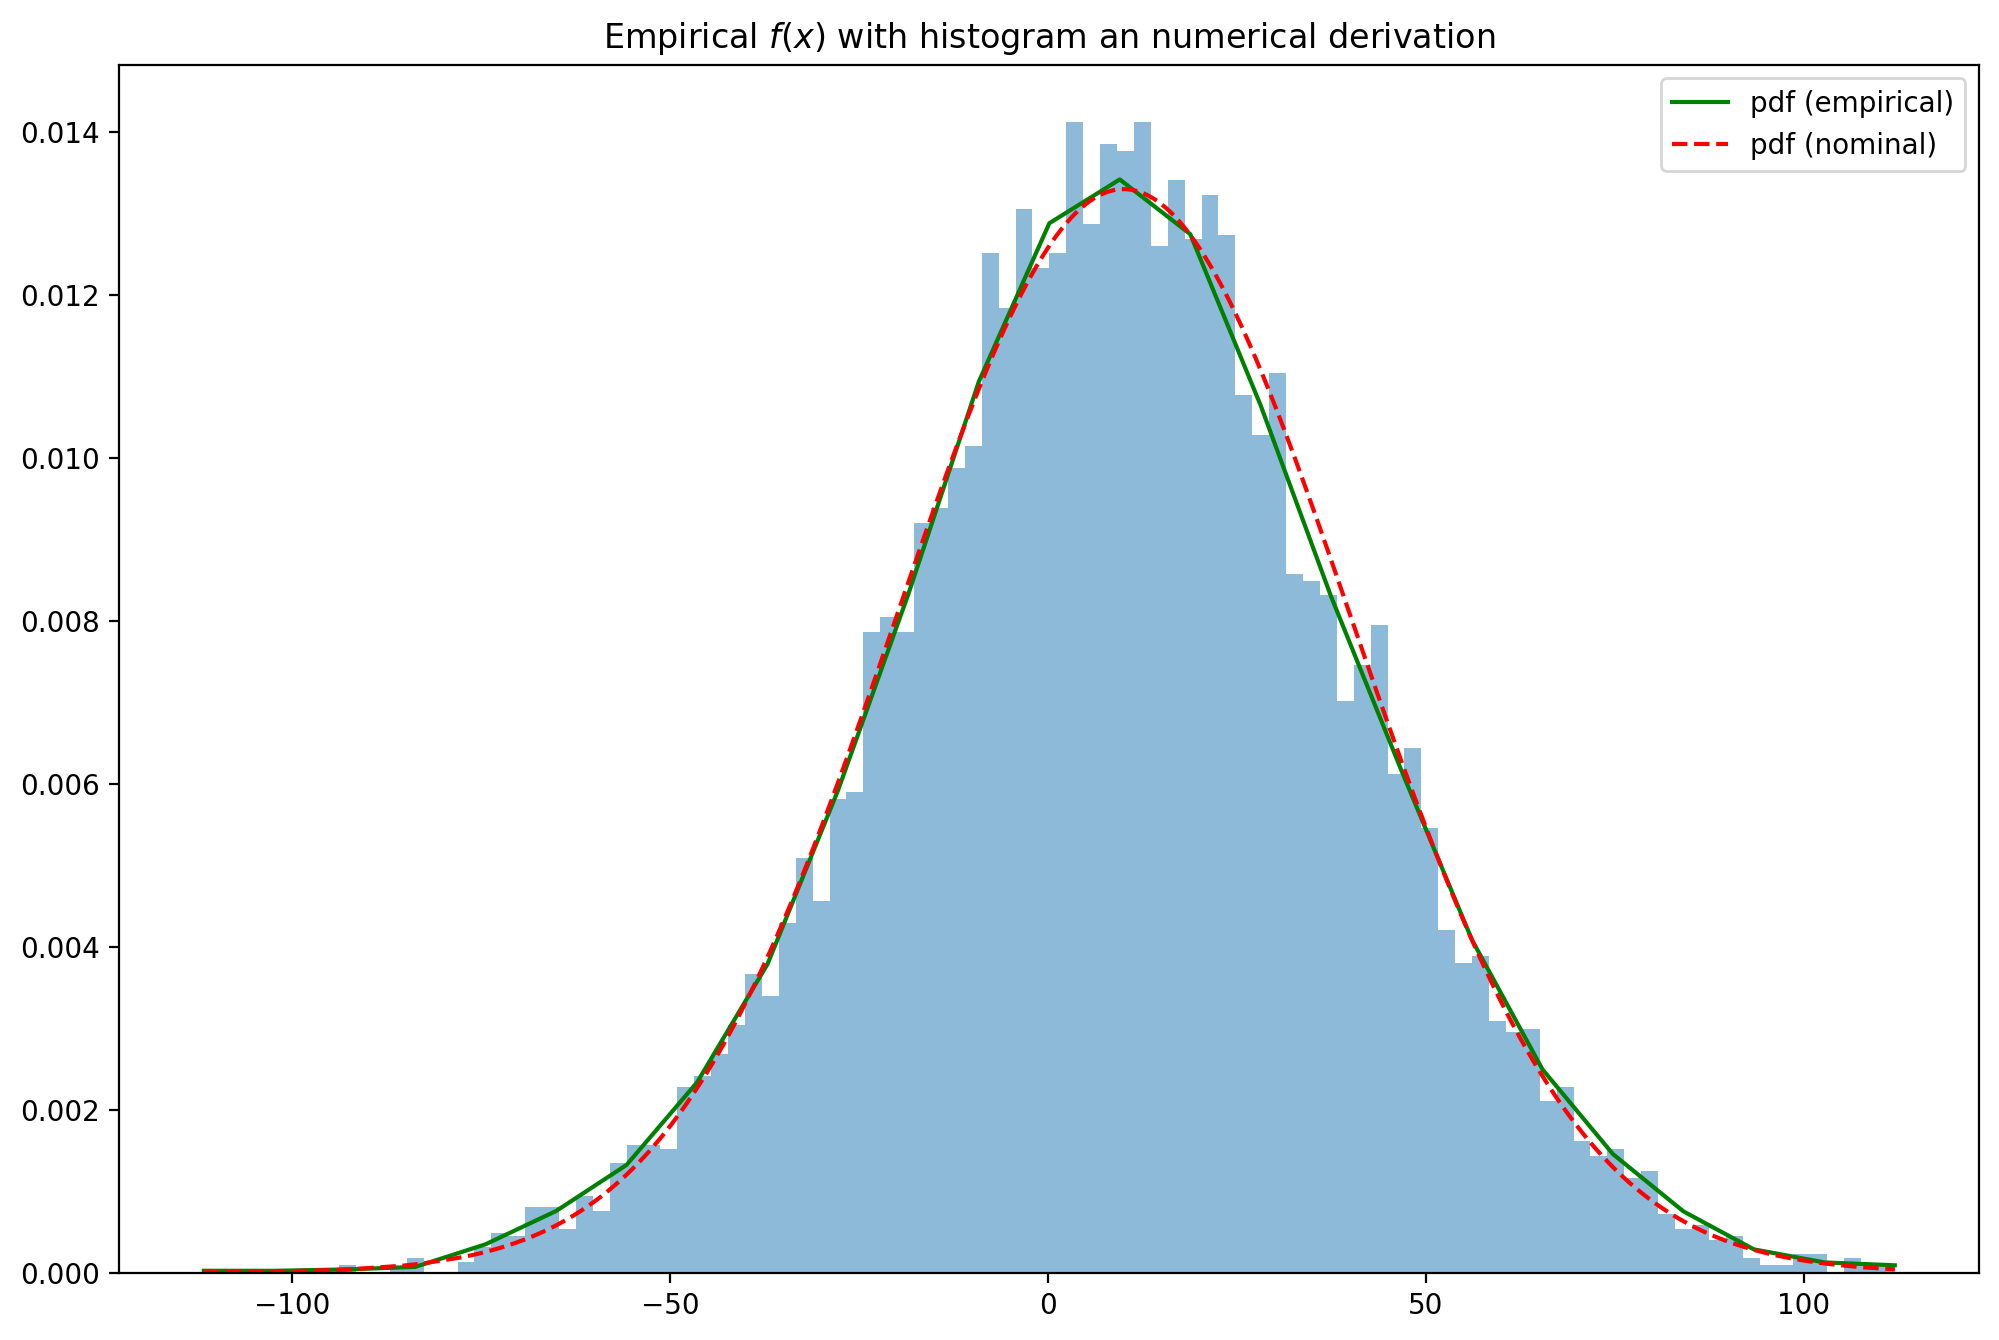

In [12]:
fig,ax = plt.subplots()
fig.set_dpi(200)
ax.hist(values, bins=100, density=True, zorder=-10, alpha=0.5);
ax.plot(x_,pdf_empirical,'g-', label='pdf (empirical)')

pdf_nominal=norm.pdf(values,loc=MU, scale=SIGMA)
ax.plot(values,pdf_nominal,'r--', label='pdf (nominal)')

ax.set_title('Empirical $f(x)$ with histogram an numerical derivation')
ax.legend();

## But how can $F(x)$ be created this way?
Create an array of random samples from a discrete uniform distribution over [0,2].

In [13]:
N=10000
x_max=2
x_sample = np.random.randint(low=0,high=x_max+1,size=N)

values = np.sort(x_sample)
density = np.arange(N)/N

x_=np.arange(0,x_max+1,1)
cdf_empirical = np.interp(x_, values,density,)


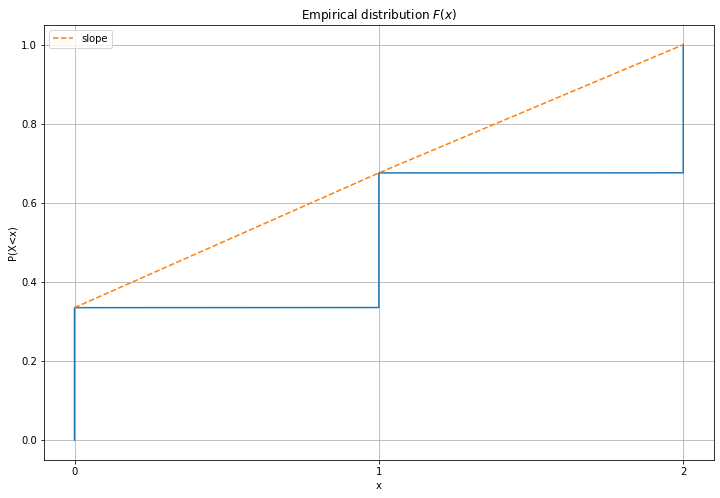

In [14]:
fig,ax=plt.subplots()
ax.plot(values,density,'-');
ax.plot(x_,cdf_empirical,'--', label='slope')
ax.legend()
ax.set_title('Empirical distribution $F(x)$');
ax.set_xlabel('x')
ax.set_ylabel('P(X<x)');
ax.set_xticks(np.arange(0,x_max+1,1))
ax.grid()

In [15]:
(1-cdf_empirical[0])/x_max

0.3326

## 1.3	Quantiles of X
The concept of quantile is important in reliability analysis and extreme predictions. The quantile of a distribution could be defined in different ways. For the random variable $X$, the quantile as a number of $x_{\alpha}$ is defined as,
$$F(x_{\alpha})=P(X<x_{\alpha})=\alpha$$


In [16]:
norm.ppf(0.05,loc=MU, scale=SIGMA)

-39.345608808544185

In [17]:
norm.ppf(0.95,loc=MU, scale=SIGMA)

59.34560880854416

### Numerical quantiles:

In [18]:
np.quantile(x,0.05)

1.0*x

In [19]:
np.quantile(x,0.95)

1.0*x

## 2	Distributions of two or more random variables
Let $X$, $Y$ denote two independent random variables, while $X, Y\in[0, +\infty]$. The joint pdf and cdf are represented by $f_{X,Y}(x,y)$ and $F_{X,Y}(x,y)$, respectively. 

* Please write down the relation between the joint pdf and cdf of X and Y.

In [20]:
x,y,zeta_1,zeta_2 = sp.symbols('x y zeta_1 zeta_2')
f_x_y = sp.Function('f_x,y')(x,y)  # PDF
F_x_y = sp.Function('F_x,y')(x,y)  # CDF


In [21]:
equation_CDF2 = sp.Eq(F_x_y,sp.Integral(f_x_y,(zeta_2, -sp.oo, y),(zeta_1, -sp.oo, x)))
equation_CDF2

Eq(F_x,y(x, y), Integral(f_x,y(x, y), (zeta_2, -oo, y), (zeta_1, -oo, x)))

* Please write down the marginal distributions of X and Y, respectively.

In [22]:
F_x = sp.Function('F_x')(x)  # CDF
sp.Eq(F_x,sp.Integral(f_x_y,(zeta_2, -sp.oo, sp.oo),(zeta_1, -sp.oo, x)))

Eq(F_x(x), Integral(f_x,y(x, y), (zeta_2, -oo, oo), (zeta_1, -oo, x)))

In [23]:
F_y = sp.Function('F_y')(y)  # CDF
sp.Eq(F_y,sp.Integral(f_x_y,(zeta_2, -sp.oo, y),(zeta_1, -sp.oo, sp.oo)))

Eq(F_y(y), Integral(f_x,y(x, y), (zeta_2, -oo, y), (zeta_1, -oo, oo)))

In [24]:
from sympy.stats import P, E, variance, Die, Normal

* Please write down the expected value and variance of X and Y, respectively.
# ???

## Common used distribution in maritime industry
In the maritime industry, a few distributions are commonly used for design and safety analysis. Without going too much into the details, the normal distribution is definitely the most popular distribution type. When values of observed data are too scattered, the lognormal distribution could be used to describe the data distribution. In the engineering applications, ship responses, for example motions, stress signals etc., are often assumed to be Gaussian for convenience even though it is not the real case. Then the local maxima (minima) of the response are often Rayleigh distributed. Further, the Weibull distribution is often used to describe the stress range distribution for long-term fatigue analysis, while Gumbel distribution to fit the yearly maxima for extreme predictions.
After this course, you are supposed to know the exact forms of some distributions, for example normal and lognormal. For others, you have to know at least how to compute the probability using the Matlab commands. Here the stress signals measured in a 4400TEU container ship will be used in the following exercise. You could download the data from the course website.


### Weibull distribution
[Wikipedia](https://en.wikipedia.org/wiki/Weibull_distribution)

In [25]:
from scipy.stats import exponweib

The Weibull Minimum Extreme Value distribution, from extreme value theory, is also often simply called the Weibull distribution.

In [26]:
def f(lamda=1.0,k=2.0, MU=0.0, SIGMA=1.0):

    N=200
    x=np.linspace(0,6,N)
    pdf = exponweib.pdf(x,lamda,k,loc=MU, scale=SIGMA)

    fig,ax = plt.subplots()
    ax.plot(x,pdf);
    ax.set_xlabel('x')
    ax.set_ylabel('P(x)')
    ax.set_title('Weibull distribution ($\lambda$:%0.2f, $k$:%0.2f)' % (lamda,k));
    ax.set_xlim(0,6)
    ax.set_ylim(0,3)
    
interactive_plot = interactive(f, lamda=(1.0, 3.0, 0.2), k=(0.2, 5, 0.2), MU=(0,4,0.2), SIGMA=(0.5,3.0,0.2))
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='lamda', max=3.0, min=1.0, step=0.2), FloatSlider(val…